In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

from components import *

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [4]:
BATCH_SIZE = 256
INPUT_SIZE = Generator.INPUT_SIZE
REAL_LABEL, FAKE_LABEL = 1, 0
dataloader = get_data_loader(batch_size=BATCH_SIZE)

In [5]:
netG = Generator().to(device)
netD = Discriminator().to(device)

optimizerD = torch.optim.RMSprop(netD.parameters(), lr=0.00005)
optimizerG = torch.optim.RMSprop(netG.parameters(), lr=0.00005)

WEIGHT_CLIPPING_LIMIT = 0.01
N_CRITIC = 5


<img src='https://miro.medium.com/max/1750/1*Yfa9bZL0d4NHaU1mHbGzjw.jpeg'>

In [31]:
def train(num_epochs = 1):

    label_real = torch.full((BATCH_SIZE,), REAL_LABEL, device=device, dtype=torch.float)
    label_fake = torch.full((BATCH_SIZE,), FAKE_LABEL, device=device, dtype=torch.float)

    for epoch in range(num_epochs):
        print('   EPOCH: ', epoch)
        for i, data in enumerate(dataloader, 0):
            # ===========TRAIN_DISCRIMINSTOR============
            for _ in range(N_CRITIC):
                netD.zero_grad()
                data_real = data[0].to(device)
                output_real = netD(data_real).view(-1)
                
                D_loss_real = output_real.mean(0).view(1)
                D_loss_real.backward()

                noise = torch.randn(BATCH_SIZE, INPUT_SIZE, 1, 1, device=device)
                data_fake = netG(noise)
                output_fake = netD(data_fake.detach()).view(-1)
                
                D_loss_fake = output_fake.mean().view(1)
                D_loss_fake.backward(torch.FloatTensor([-1.]).to(device))

                D_loss = D_loss_fake - D_loss_real
                Wasserstein_D = -D_loss
                optimizerD.step()
                
                for p in netD.parameters():
                    p.data.clamp_(-WEIGHT_CLIPPING_LIMIT, WEIGHT_CLIPPING_LIMIT)

            # ===============TRAIN_GENERATOR===============
            netG.zero_grad()
            output = netD(data_fake).view(-1)
            G_loss = output.mean().mean(0).view(1)

            G_loss.backward()
            G_cost = -G_loss
            optimizerG.step()

            # Output training stats
            if i % 100 == 0:
                print('[%.3d/%d]  Wasserstein: %.4f   Loss_D: %.4f   Loss_G: %.4f   Loss_D_real: %.4f   Loss_D_fake: %.4f'
                      % (i, len(dataloader),
                         Wasserstein_D.data[0],
                         D_loss.data[0],
                         G_cost.data[0],
                         D_loss_real.data[0],
                         D_loss_fake.data[0]))


## TRAINING PROCESS

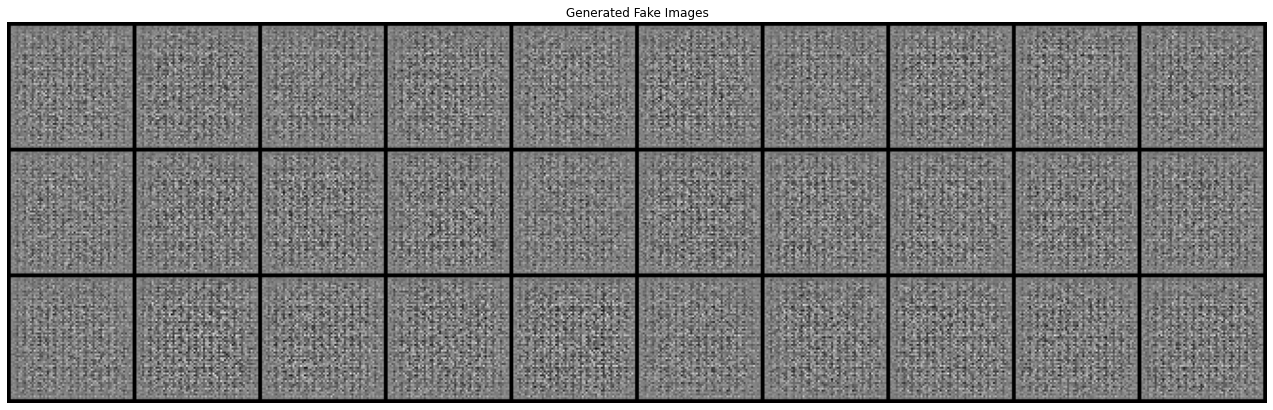

In [12]:
generate_images(netG)

In [32]:
train(num_epochs=10)

   EPOCH:  0
[000/234]   Wasserstein: -0.0114   Loss_D: 0.0114   Loss_G: -0.4971   Loss_D_real: 0.4849   Loss_D_fake: 0.4963
[100/234]   Wasserstein: -0.2245   Loss_D: 0.2245   Loss_G: -0.6305   Loss_D_real: 0.3803   Loss_D_fake: 0.6048
[200/234]   Wasserstein: -0.2559   Loss_D: 0.2559   Loss_G: -0.6488   Loss_D_real: 0.3651   Loss_D_fake: 0.6210
   EPOCH:  1
[000/234]   Wasserstein: -0.2211   Loss_D: 0.2211   Loss_G: -0.6529   Loss_D_real: 0.3596   Loss_D_fake: 0.5807
[100/234]   Wasserstein: -0.2423   Loss_D: 0.2423   Loss_G: -0.6477   Loss_D_real: 0.3591   Loss_D_fake: 0.6014
[200/234]   Wasserstein: -0.2579   Loss_D: 0.2579   Loss_G: -0.6351   Loss_D_real: 0.3677   Loss_D_fake: 0.6256
   EPOCH:  2
[000/234]   Wasserstein: -0.2342   Loss_D: 0.2342   Loss_G: -0.5999   Loss_D_real: 0.4124   Loss_D_fake: 0.6466
[100/234]   Wasserstein: -0.2570   Loss_D: 0.2570   Loss_G: -0.6212   Loss_D_real: 0.3853   Loss_D_fake: 0.6423
[200/234]   Wasserstein: -0.2191   Loss_D: 0.2191   Loss_G: -0.58

KeyboardInterrupt: 

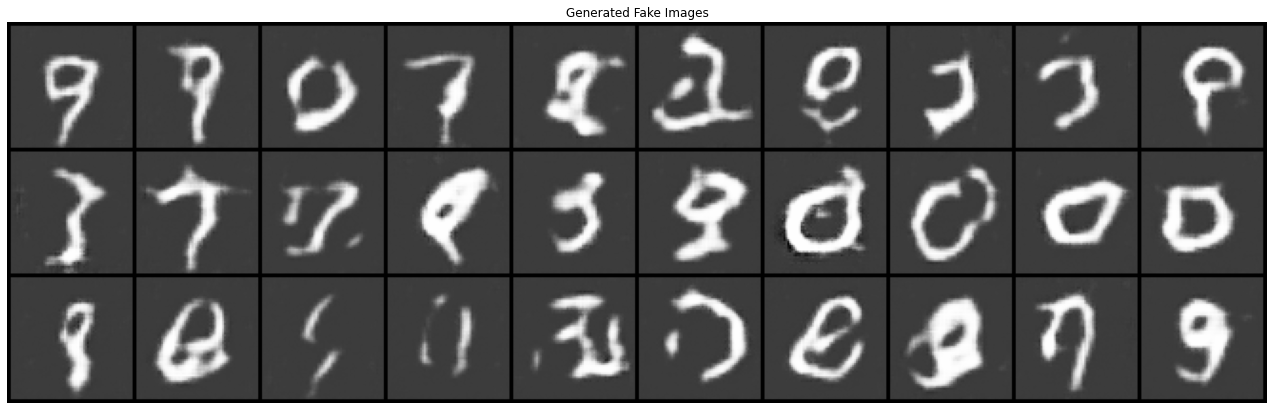

In [33]:
generate_images(netG)

In [34]:
train(num_epochs=10)

   EPOCH:  0
[000/234]   Wasserstein: -0.2148   Loss_D: 0.2148   Loss_G: -0.6298   Loss_D_real: 0.3703   Loss_D_fake: 0.5852
[100/234]   Wasserstein: -0.2134   Loss_D: 0.2134   Loss_G: -0.6414   Loss_D_real: 0.3634   Loss_D_fake: 0.5768
[200/234]   Wasserstein: -0.2406   Loss_D: 0.2406   Loss_G: -0.6372   Loss_D_real: 0.3644   Loss_D_fake: 0.6051
   EPOCH:  1
[000/234]   Wasserstein: -0.2022   Loss_D: 0.2022   Loss_G: -0.6401   Loss_D_real: 0.3690   Loss_D_fake: 0.5711
[100/234]   Wasserstein: -0.2071   Loss_D: 0.2071   Loss_G: -0.6342   Loss_D_real: 0.3674   Loss_D_fake: 0.5746
[200/234]   Wasserstein: -0.2425   Loss_D: 0.2425   Loss_G: -0.6265   Loss_D_real: 0.3737   Loss_D_fake: 0.6161
   EPOCH:  2
[000/234]   Wasserstein: -0.2411   Loss_D: 0.2411   Loss_G: -0.6384   Loss_D_real: 0.3644   Loss_D_fake: 0.6056
[100/234]   Wasserstein: -0.1893   Loss_D: 0.1893   Loss_G: -0.6329   Loss_D_real: 0.3651   Loss_D_fake: 0.5545
[200/234]   Wasserstein: -0.2337   Loss_D: 0.2337   Loss_G: -0.61

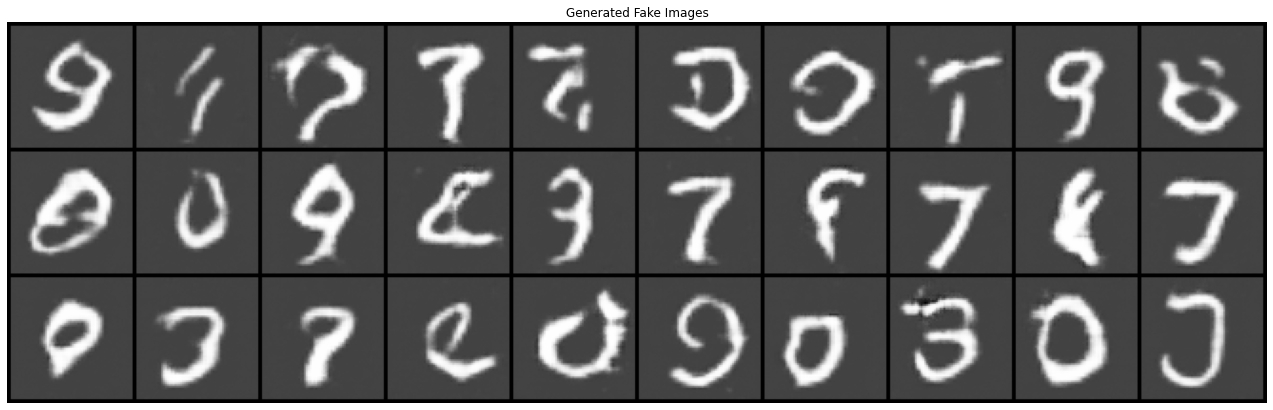

In [35]:
generate_images(netG)

In [36]:
train(num_epochs=10)

   EPOCH:  0
[000/234]   Wasserstein: -0.1803   Loss_D: 0.1803   Loss_G: -0.5438   Loss_D_real: 0.4551   Loss_D_fake: 0.6354
[100/234]   Wasserstein: -0.1943   Loss_D: 0.1943   Loss_G: -0.6425   Loss_D_real: 0.3573   Loss_D_fake: 0.5516
[200/234]   Wasserstein: -0.1770   Loss_D: 0.1770   Loss_G: -0.5362   Loss_D_real: 0.4571   Loss_D_fake: 0.6341
   EPOCH:  1
[000/234]   Wasserstein: -0.2702   Loss_D: 0.2702   Loss_G: -0.6424   Loss_D_real: 0.3585   Loss_D_fake: 0.6287
[100/234]   Wasserstein: -0.2820   Loss_D: 0.2820   Loss_G: -0.6428   Loss_D_real: 0.3593   Loss_D_fake: 0.6412
[200/234]   Wasserstein: -0.2503   Loss_D: 0.2503   Loss_G: -0.6398   Loss_D_real: 0.3569   Loss_D_fake: 0.6071
   EPOCH:  2
[000/234]   Wasserstein: -0.2814   Loss_D: 0.2814   Loss_G: -0.6436   Loss_D_real: 0.3586   Loss_D_fake: 0.6400
[100/234]   Wasserstein: -0.2546   Loss_D: 0.2546   Loss_G: -0.6342   Loss_D_real: 0.3666   Loss_D_fake: 0.6212
[200/234]   Wasserstein: -0.2497   Loss_D: 0.2497   Loss_G: -0.64

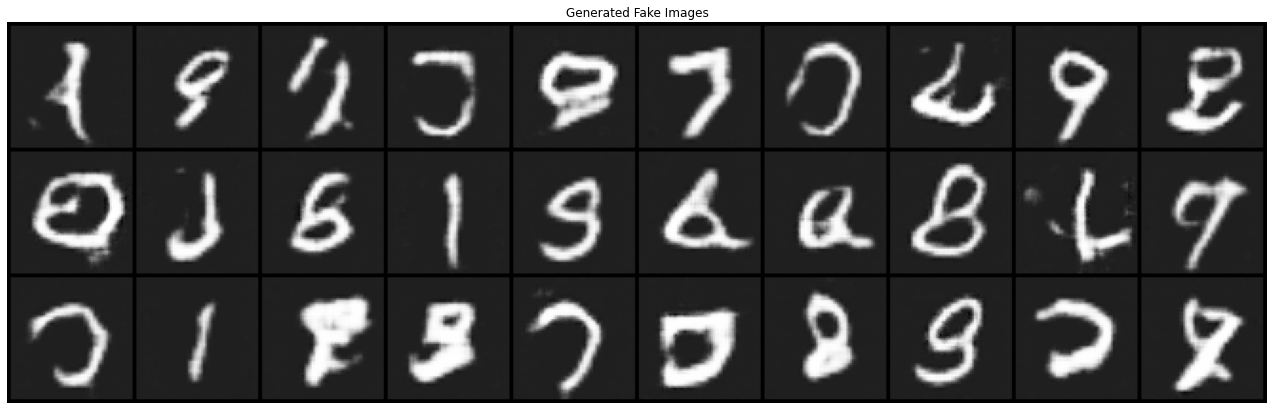

In [37]:
generate_images(netG)

In [38]:
train(num_epochs=10)

   EPOCH:  0
[000/234]   Wasserstein: -0.1835   Loss_D: 0.1835   Loss_G: -0.5495   Loss_D_real: 0.4548   Loss_D_fake: 0.6383
[100/234]   Wasserstein: -0.1615   Loss_D: 0.1615   Loss_G: -0.5419   Loss_D_real: 0.4679   Loss_D_fake: 0.6294
[200/234]   Wasserstein: -0.2770   Loss_D: 0.2770   Loss_G: -0.6403   Loss_D_real: 0.3602   Loss_D_fake: 0.6372
   EPOCH:  1
[000/234]   Wasserstein: -0.2429   Loss_D: 0.2429   Loss_G: -0.6436   Loss_D_real: 0.3586   Loss_D_fake: 0.6014
[100/234]   Wasserstein: -0.2735   Loss_D: 0.2735   Loss_G: -0.6401   Loss_D_real: 0.3626   Loss_D_fake: 0.6360
[200/234]   Wasserstein: -0.2094   Loss_D: 0.2094   Loss_G: -0.6458   Loss_D_real: 0.3561   Loss_D_fake: 0.5655
   EPOCH:  2
[000/234]   Wasserstein: -0.2435   Loss_D: 0.2435   Loss_G: -0.6368   Loss_D_real: 0.3634   Loss_D_fake: 0.6069
[100/234]   Wasserstein: -0.1583   Loss_D: 0.1583   Loss_G: -0.5252   Loss_D_real: 0.4761   Loss_D_fake: 0.6343
[200/234]   Wasserstein: -0.2806   Loss_D: 0.2806   Loss_G: -0.64

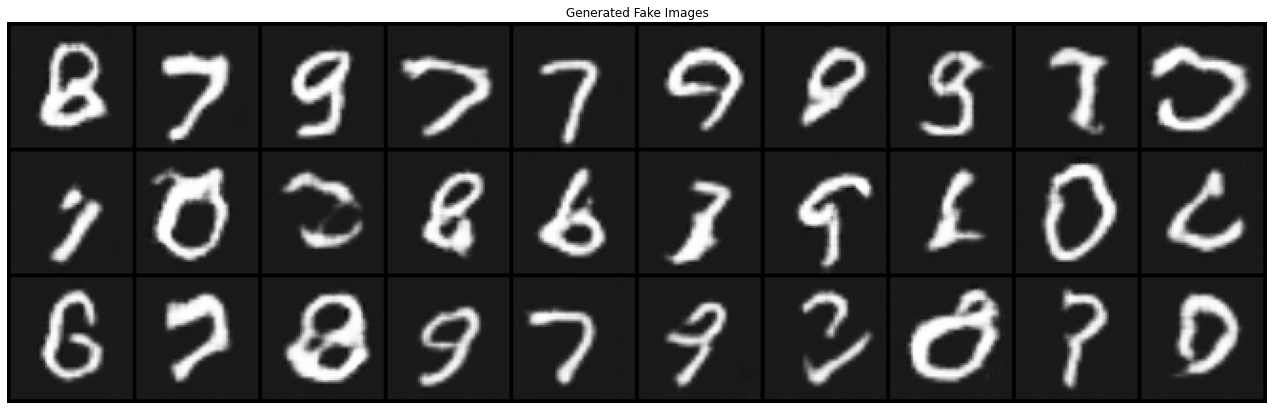

In [39]:
generate_images(netG)

In [40]:
train(num_epochs=10)

   EPOCH:  0
[000/234]   Wasserstein: -0.1772   Loss_D: 0.1772   Loss_G: -0.5402   Loss_D_real: 0.4600   Loss_D_fake: 0.6372
[100/234]   Wasserstein: -0.1726   Loss_D: 0.1726   Loss_G: -0.5317   Loss_D_real: 0.4629   Loss_D_fake: 0.6355
[200/234]   Wasserstein: -0.2250   Loss_D: 0.2250   Loss_G: -0.6375   Loss_D_real: 0.3644   Loss_D_fake: 0.5894
   EPOCH:  1
[000/234]   Wasserstein: -0.2335   Loss_D: 0.2335   Loss_G: -0.6350   Loss_D_real: 0.3666   Loss_D_fake: 0.6001
[100/234]   Wasserstein: -0.2591   Loss_D: 0.2591   Loss_G: -0.6366   Loss_D_real: 0.3639   Loss_D_fake: 0.6230
[200/234]   Wasserstein: -0.1894   Loss_D: 0.1894   Loss_G: -0.6375   Loss_D_real: 0.3586   Loss_D_fake: 0.5480
   EPOCH:  2
[000/234]   Wasserstein: -0.2507   Loss_D: 0.2507   Loss_G: -0.6294   Loss_D_real: 0.3695   Loss_D_fake: 0.6203
[100/234]   Wasserstein: -0.2136   Loss_D: 0.2136   Loss_G: -0.6410   Loss_D_real: 0.3616   Loss_D_fake: 0.5752
[200/234]   Wasserstein: -0.1675   Loss_D: 0.1675   Loss_G: -0.54

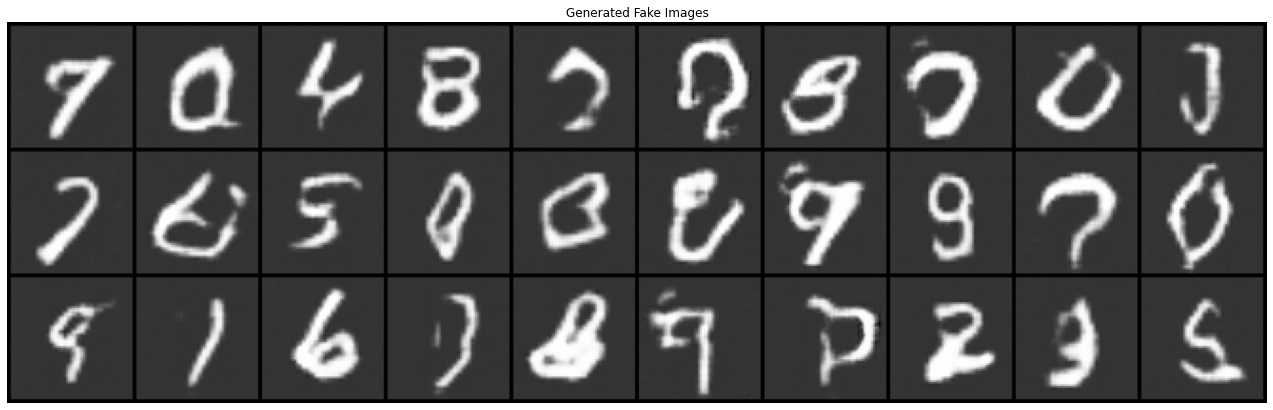

In [41]:
generate_images(netG)

In [42]:
train(num_epochs=10)

   EPOCH:  0
[000/234]   Wasserstein: -0.2467   Loss_D: 0.2467   Loss_G: -0.6222   Loss_D_real: 0.3775   Loss_D_fake: 0.6243
[100/234]   Wasserstein: -0.2592   Loss_D: 0.2592   Loss_G: -0.6337   Loss_D_real: 0.3673   Loss_D_fake: 0.6265
[200/234]   Wasserstein: -0.1741   Loss_D: 0.1741   Loss_G: -0.5428   Loss_D_real: 0.4573   Loss_D_fake: 0.6315
   EPOCH:  1
[000/234]   Wasserstein: -0.1627   Loss_D: 0.1627   Loss_G: -0.6298   Loss_D_real: 0.3660   Loss_D_fake: 0.5287
[100/234]   Wasserstein: -0.2390   Loss_D: 0.2390   Loss_G: -0.6364   Loss_D_real: 0.3626   Loss_D_fake: 0.6016
[200/234]   Wasserstein: -0.2043   Loss_D: 0.2043   Loss_G: -0.6222   Loss_D_real: 0.3808   Loss_D_fake: 0.5851
   EPOCH:  2
[000/234]   Wasserstein: -0.1582   Loss_D: 0.1582   Loss_G: -0.6397   Loss_D_real: 0.3610   Loss_D_fake: 0.5193
[100/234]   Wasserstein: -0.1812   Loss_D: 0.1812   Loss_G: -0.6276   Loss_D_real: 0.3715   Loss_D_fake: 0.5528
[200/234]   Wasserstein: -0.1687   Loss_D: 0.1687   Loss_G: -0.53

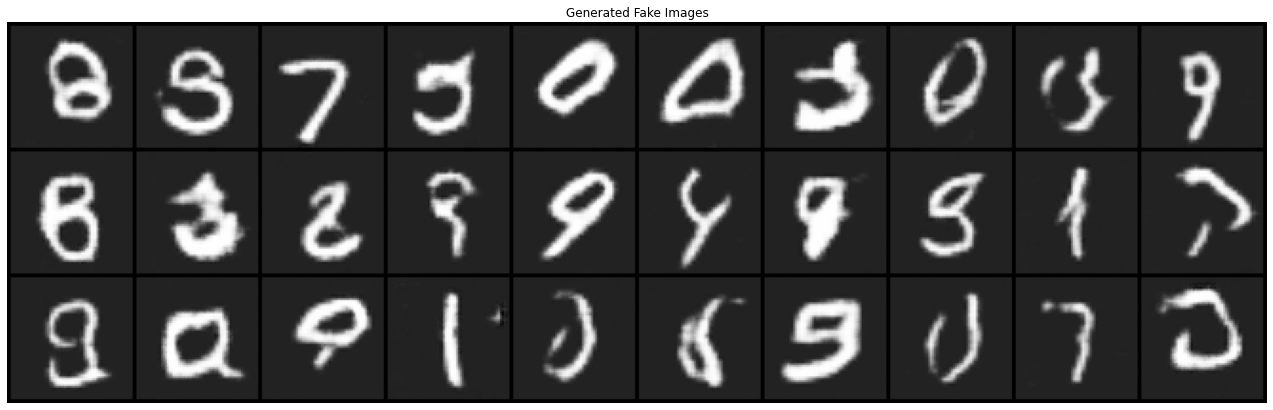

In [43]:
generate_images(netG)